In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
d = pd.read_csv('fluct_6400000.000000_0.000000_1000000_0.001000.txt')
w = d.w[0]
N = d.N[0]
dx = d.dx[0]

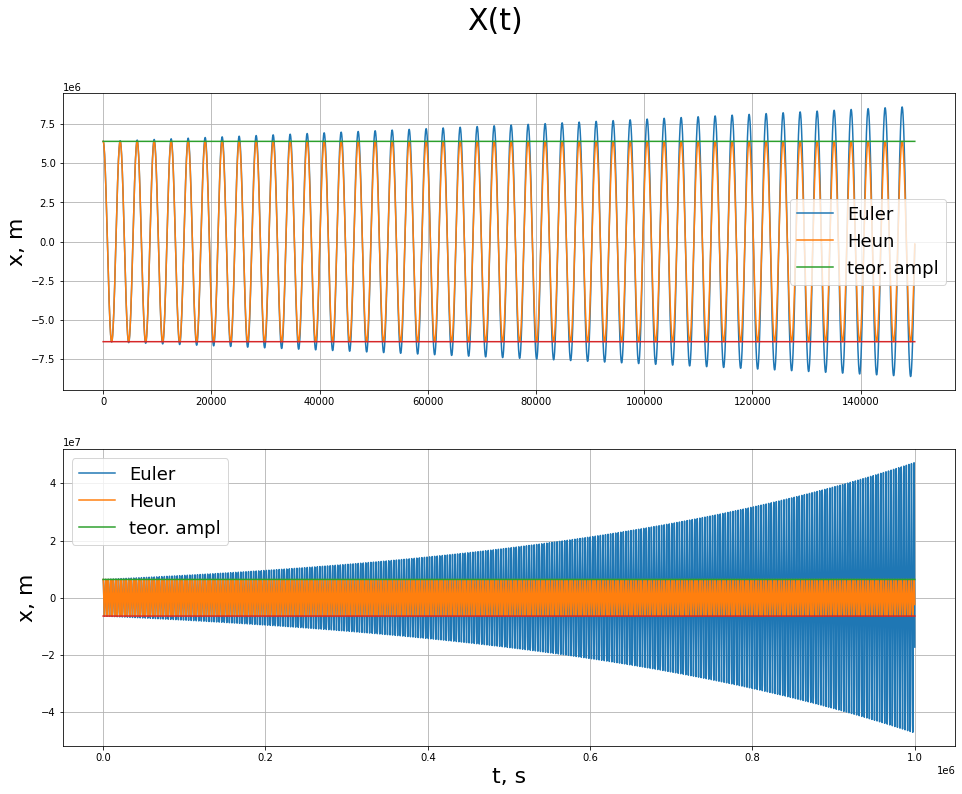

In [131]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('X(t)', fontsize=30)
fig.set_size_inches(16, 12)

t = np.linspace(0, len(d)*0.15, int(len(d)*0.15))
ax1.plot(t, d.x_e[:len(t)], '-', label='Euler')
ax1.plot(t, d.x_h[:len(t)], '-', label='Heun')
ax1.plot(t, t-t+6.4e6, label='teor. ampl')
ax1.plot(t, t-t-6.4e6)
ax1.set_ylabel('x, m', fontsize=22)
ax1.legend(fontsize=18, loc='best')

t = np.linspace(0, len(d), len(d))
ax2.plot(t, d.x_e, '-', label='Euler')
ax2.plot(t, d.x_h, '-', label='Heun')
ax2.plot(t, t-t+6.4e6, label='teor. ampl')
ax2.plot(t, t-t-6.4e6)
ax2.set_ylabel('x, m', fontsize=22)
ax2.set_xlabel('t, s', fontsize=22)
ax2.legend(fontsize=18, loc='best')


ax1.grid(True)
ax2.grid(True)
plt.show()

Видно, что Хойн устойчивее (считалось на шаге 0,001).
Теоретическое предсказание нарисовал прямыми, потому что Хойн и теория становятся неотличимы.  
Проблема метода Эйлера в излишнем пренебрежении - за основу рассчета берется система
$\begin{cases}
v_{i+1} = v_i + a_i \Delta t,\\
x_{i+1} = x_i + v_i \Delta t
\end{cases}$. 
Но это неправильно, ведь при рассчете шага координаты мы считаем, что движение равномерное, а в рассчете скорости - что движение равноускоренное. Правильнее было бы
$\begin{cases}
v_{i+1} = v_i + a_i \Delta t,\\
x_{i+1} = x_i + v_i \Delta t + \frac{a_i}{2} (\Delta t)^2
\end{cases}$  
Хойн учитывает эту проблему усредняя по $i$ и $i+1$ шагу.

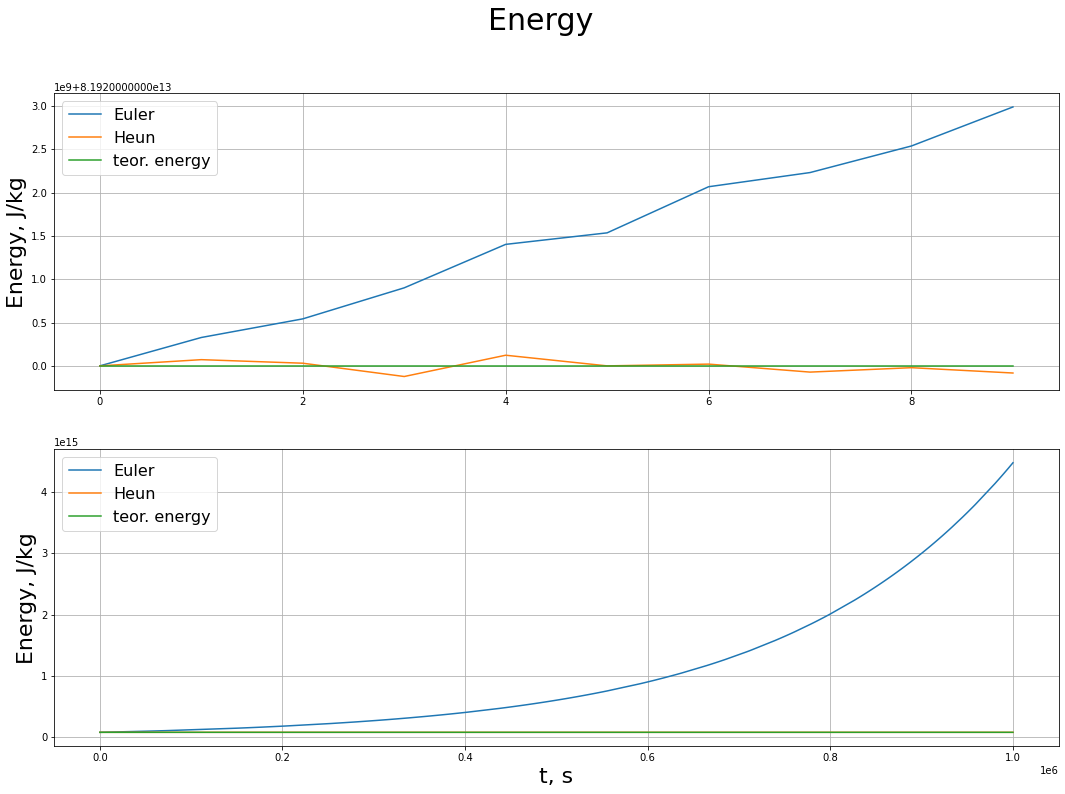

In [132]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Energy', fontsize=30)
fig.set_size_inches(18, 12)

t = np.linspace(0, len(d), len(d))
E_e = 0.5 * (d.v_e**2 + w**2*d.x_e**2)
E_h = 0.5 * (d.v_h**2 + w**2*d.x_h**2)

ax1.plot(t[:int(1e-5*len(t))], E_e[:int(1e-5*len(t))], '-', label='Euler')
ax1.plot(t[:int(1e-5*len(t))], E_h[:int(1e-5*len(t))], '-', label='Heun')
ax1.plot(t[:int(1e-5*len(t))], t[:int(1e-5*len(t))]-t[:int(1e-5*len(t))]+E_e[0], label='teor. energy')
ax1.set_ylabel('Energy, J/kg', fontsize=22)

ax2.plot(t, E_e, '-', label='Euler')
ax2.plot(t, E_h, '-', label='Heun')
ax2.plot(t, t-t+E_e[0], label='teor. energy')
ax2.set_ylabel('Energy, J/kg', fontsize=22)
ax2.set_xlabel('t, s', fontsize=22)

ax1.legend(fontsize=16, loc='best')
ax2.legend(fontsize=16, loc='best')
ax1.grid(True)
ax2.grid(True)
plt.show()

Как видно из графика, метод Эйлера не сохраняет энергию, она растет с экспоненциальной скоростью. Хойн же в среднем сохраняет энергию, отклонение от теории мало.